# Rainfall Prediction


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. 

It means -- did it rain the next day, Yes or No? 

This column is Yes if the rain for that day was 1mm or more.

In [4]:
df.shape

(145460, 23)

## View column names

In [5]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Lets check the missing values if any
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Cleaning

### Analysis of Target Feature

In [9]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<AxesSubplot:title={'center':'RainTomorrow value counts'}, xlabel='RainTomorrow', ylabel='count'>

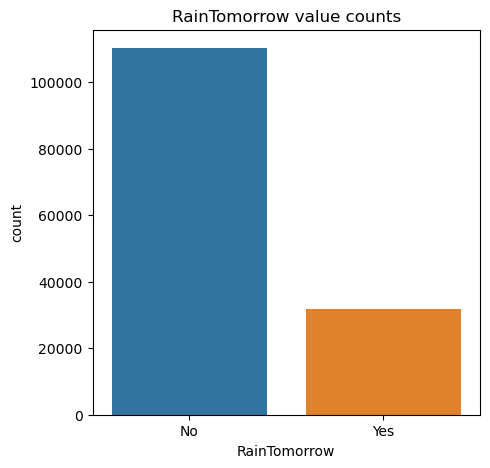

In [10]:
plt.figure(figsize=(5,5))
plt.title('RainTomorrow value counts')
sns.countplot(x=df["RainTomorrow"])

In [11]:
df['RainTomorrow'].isnull().sum()

3267

In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

## Handling Missing values in Numerical columns

In [13]:
numerical = df.select_dtypes(include=['float64'])
numeric_cols = numerical.columns
numeric_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [14]:
# Filling the missing data with the mean value for a numerical variable
for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())

In [15]:
numerical_imputed = df.select_dtypes(include=['float64'])
numerical_imputed.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Explore Categorical Variables

In [16]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Summary of categorical variables

There are 6 categorical variables. They are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow

There are two binary categorical variables - RainToday and RainTomorrow

RainTomorrow is the target variable.

In [17]:
# Missing values in Categorical Variables
categorical.isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

## Handling missing values in Categorical columns

In [18]:
# handling missing values in Rain today and tomorrow columns
# Raintoday
df['RainToday'] = df['RainToday'].fillna('No')
# Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

In [19]:
df = df.dropna()

In [20]:
df = df.drop('Date', axis = 1)

In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [22]:
label_dict = {'No': 0,'Yes':1}
df['RainTomorrow'] = df['RainTomorrow'].map(label_dict)
df['RainToday'] = df['RainToday'].map(label_dict)

In [23]:
categorical_1 = df.select_dtypes(include=['object'])
categorical_cols = categorical_1.columns 

In [24]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)
        
        # dropping original columns for which encoding is applied.
        df.drop(col, axis=1,inplace=True)
    return df

In [25]:
# Apply onehotencoder on categorical features
df = onehot_encoder(df,categorical_cols)

In [26]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
x = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

## Scaling Data

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

## splitting data

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size =0.2, random_state = 42)

# Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RandomForest Classifier

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

## Gaussian Naive Bayes

In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

## KNN classifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decisiontree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)

# Evaluating models

### Accuracy

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_lr))
print("Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred_dtree))
print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf))
print("Accuracy of KNN: ", accuracy_score(y_test, y_pred_knn))
print("Accuracy of Gaussian Naivebayes: ", accuracy_score(y_test, y_pred_gnb))

Accuracy of Logistic Regression:  0.8507568590350048
Accuracy of Decision Tree:  0.7955692210659098
Accuracy of Random Forest:  0.8552507095553453
Accuracy of KNN:  0.8218621885840429
Accuracy of Gaussian Naivebayes:  0.6571270892462946


### classification Report

In [40]:
print("Classification Report of Logistic Regression: \n", classification_report(y_test, y_pred_lr))
print("Classification Report of Decision Tree: \n", classification_report(y_test, y_pred_dtree))
print("Classification Report of Random Forest:\n ", classification_report(y_test, y_pred_rf))
print("Classification Report of KNN: \n", classification_report(y_test, y_pred_knn))
print("Classification Report of Gaussian Naivebayes:\n ", classification_report(y_test, y_pred_gnb))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     19837
           1       0.73      0.50      0.59      5531

    accuracy                           0.85     25368
   macro avg       0.80      0.72      0.75     25368
weighted avg       0.84      0.85      0.84     25368

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     19837
           1       0.53      0.53      0.53      5531

    accuracy                           0.80     25368
   macro avg       0.70      0.70      0.70     25368
weighted avg       0.80      0.80      0.80     25368

Classification Report of Random Forest:
                precision    recall  f1-score   support

           0       0.87      0.96      0.91     19837
           1       0.77      0.48      0.59      5531

    accuracy                           0.86     25

### Confusion matrix

In [41]:
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(y_test, y_pred_lr))
print("Confusion Matrix of Decision Tree: \n", confusion_matrix(y_test, y_pred_dtree))
print("Confusion Matrix of Random Forest:\n ", confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix of KNN: \n", confusion_matrix(y_test, y_pred_knn))
print("Confusion Matrix of Gaussian Naivebayes:\n ", confusion_matrix(y_test, y_pred_gnb))

Confusion Matrix of Logistic Regression: 
 [[18806  1031]
 [ 2755  2776]]
Confusion Matrix of Decision Tree: 
 [[17224  2613]
 [ 2573  2958]]
Confusion Matrix of Random Forest:
  [[19014   823]
 [ 2849  2682]]
Confusion Matrix of KNN: 
 [[18239  1598]
 [ 2921  2610]]
Confusion Matrix of Gaussian Naivebayes:
  [[12777  7060]
 [ 1638  3893]]
